In [1]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from random import shuffle
import pandas as pd
import cv2
import os
from tqdm import tqdm

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [63]:
classes_name = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [6]:
IMG_SIZE = 150

In [7]:
x = []
y = []
Daisy_dir = '/content/drive/MyDrive/flowers/daisy'
Dandelion_dir = '/content/drive/MyDrive/flowers/dandelion'
Rose_dir = '/content/drive/MyDrive/flowers/rose'
Sunflower_dir = '/content/drive/MyDrive/flowers/sunflower'
Tulip_dir = '/content/drive/MyDrive/flowers/tulip'

In [8]:
def label_img(img, flower_type):
  return flower_type

In [9]:
def create_train_data(flower_type, dir):
  for img in tqdm(os.listdir(dir)):
    label = label_img(img, flower_type)
    path = os.path.join(dir, img)
    img = cv2.imread(path, cv2. IMREAD_COLOR)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    x.append(np.array(img))
    y.append(str(label))

In [10]:
create_train_data('daisy', Daisy_dir)

100%|██████████| 764/764 [00:20<00:00, 36.79it/s] 


In [11]:
create_train_data('dandelion', Dandelion_dir)

100%|██████████| 1052/1052 [00:20<00:00, 50.35it/s] 


In [12]:
create_train_data('rose', Rose_dir)

100%|██████████| 784/784 [00:13<00:00, 60.25it/s] 


In [13]:
create_train_data('sunflower', Sunflower_dir)

100%|██████████| 733/733 [00:13<00:00, 55.53it/s] 


In [14]:
create_train_data('tulip', Tulip_dir)

100%|██████████| 984/984 [00:18<00:00, 54.58it/s] 


In [15]:
def display_random_image(classes_name, images, labels):
  index = np.random.randint(len(labels))
  plt.figure()
  plt.imshow(images[index], cmap = 'gist_gray')
  plt.xticks([])
  plt.yticks([])
  plt.grid(True)
  plt.title('Image #{} : '.format(index) + labels[index])
  plt.show()

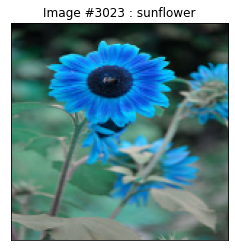

In [16]:
display_random_image(classes_name, x, y)

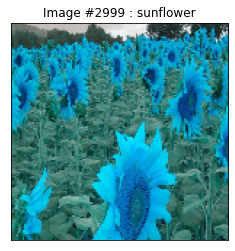

In [17]:
display_random_image(classes_name, x, y)

In [18]:
le = LabelEncoder()
z = le.fit_transform(y)
z = to_categorical(z, 5)
x= np.array(x)
x = x/255

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, z, test_size = 0.25, random_state = 42)

In [20]:
x_train.shape

(3237, 150, 150, 3)

In [21]:
x_test.shape

(1080, 150, 150, 3)

In [22]:
y_train.shape

(3237, 5)

In [23]:
y_test.shape

(1080, 5)

In [24]:
np.random.seed(42)

In [25]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5),padding= 'same', activation='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding= 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation='softmax'))

In [26]:
batch_size = 128
epochs = 50

In [27]:
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose = 1, factor=0.1)

In [28]:
datagen = ImageDataGenerator(
    featurewise_center = False, 
    samplewise_center=False,
    featurewise_std_normalization=False, 
    samplewise_std_normalization=False,
    zca_whitening=False, 
    rotation_range=10, 
    zoom_range=0.1,
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    horizontal_flip=True, 
    vertical_flip=False)
 


datagen.fit(x_train)

In [29]:
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 128)      0

In [31]:
data_history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=epochs, validation_data= (x_test, y_test),
                                   verbose = 1, steps_per_epoch = x_train.shape[0] // batch_size)

Epoch 1/50
25/25 [==============================] - 215s 8s/step - loss: 1.4597 - accuracy: 0.3477 - val_loss: 1.2327 - val_accuracy: 0.4769
Epoch 2/50
25/25 [==============================] - 210s 8s/step - loss: 1.1894 - accuracy: 0.4950 - val_loss: 1.1302 - val_accuracy: 0.5398
Epoch 3/50
25/25 [==============================] - 213s 9s/step - loss: 1.0890 - accuracy: 0.5532 - val_loss: 1.2636 - val_accuracy: 0.5204
Epoch 4/50
25/25 [==============================] - 212s 8s/step - loss: 1.0497 - accuracy: 0.5770 - val_loss: 1.0029 - val_accuracy: 0.6102
Epoch 5/50
25/25 [==============================] - 211s 8s/step - loss: 0.9756 - accuracy: 0.6166 - val_loss: 1.0353 - val_accuracy: 0.5769
Epoch 6/50
25/25 [==============================] - 217s 9s/step - loss: 0.9627 - accuracy: 0.6182 - val_loss: 0.8900 - val_accuracy: 0.6528
Epoch 7/50
25/25 [==============================] - 218s 9s/step - loss: 0.8837 - accuracy: 0.6581 - val_loss: 0.8838 - val_accuracy: 0.6519
Epoch 8/50
25

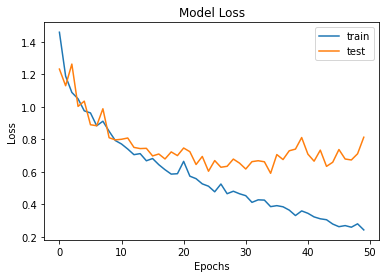

In [33]:
plt.plot(data_history.history['loss'])
plt.plot(data_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

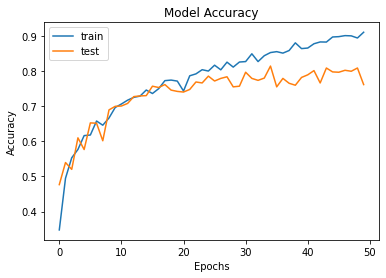

In [34]:
plt.plot(data_history.history['accuracy'])
plt.plot(data_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [37]:
pred = model.predict(x_test)
pred_digits = np.argmax(pred, axis=1)

In [38]:
test_digits = np.argmax(y_test, axis=1)

In [39]:
print("Accuracy : {}".format(accuracy_score(test_digits, pred_digits)))

Accuracy : 0.7620370370370371


In [40]:
pred_labels = le.inverse_transform(pred_digits)

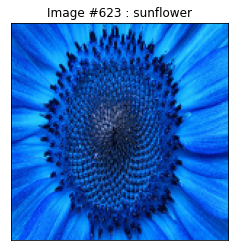

In [65]:
display_random_image(classes_name, x_test, pred_labels)

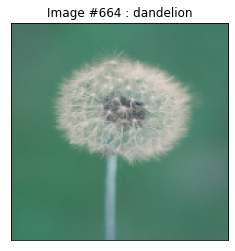

In [66]:
display_random_image(classes_name, x_test, pred_labels)

In [67]:
def display_examples(classes_name, images, labels):    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(classes_name[labels[i]])
    plt.show()

In [68]:
def flowers_mislabeled_images(classes_name, test_images, test_labels, pred_labels):
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(classes_name,  mislabeled_images, mislabeled_labels)

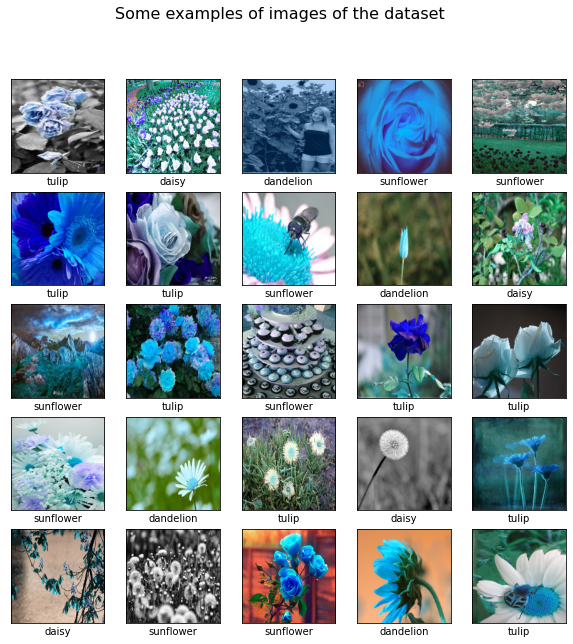

In [69]:
flowers_mislabeled_images(classes_name, x_test, test_digits, pred_digits)

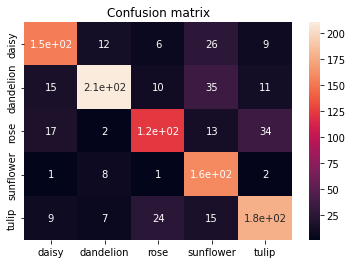

In [70]:
cm = confusion_matrix(test_digits, pred_digits)
ax = plt.axes()
sns.heatmap(cm, annot=True, annot_kws={'size': 10},
            xticklabels = classes_name,
            yticklabels = classes_name, ax = ax)
ax.set_title('Confusion matrix')
plt.show()